In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
data = pd.read_csv('/kaggle/input/okcupid-profiles/okcupid_profiles.csv')
data.head()


/kaggle/input/okcupid-profiles/okcupid_profiles.csv


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [2]:
data['status'].value_counts()
data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [3]:
data['height'].value_counts()

height
70.0    6074
68.0    5449
67.0    5354
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
95.0      20
57.0      17
83.0      12
81.0      11
82.0      11
36.0      11
84.0       9
56.0       8
55.0       6
53.0       5
94.0       3
54.0       3
91.0       3
50.0       2
88.0       2
37.0       2
48.0       2
43.0       2
1.0        1
51.0       1
90.0       1
26.0       1
85.0       1
9.0        1
89.0       1
92.0       1
87.0       1
49.0       1
47.0       1
6.0        1
42.0       1
86.0       1
3.0        1
8.0        1
93.0       1
52.0       1
4.0        1
Name: count, dtype: int64

In [4]:
data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [5]:
# Count null value
data.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

In [6]:
data.orientation.value_counts()

orientation
straight    51606
gay          5573
bisexual     2767
Name: count, dtype: int64

In [7]:
data.orientation.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

orientation
straight    86.1%
gay          9.3%
bisexual     4.6%
Name: proportion, dtype: object

In [8]:
data.speaks.value_counts()


speaks
english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: count, Length: 7647, dtype: int64

In [9]:
data.location.value_counts()

location
san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: count, Length: 199, dtype: int64

# Data cleaning and feature engineering



In [10]:
# There is 2 strange users age 109 and 110, I removed them
df_filtered = data[data['age'] < 100]
df_filtered.age.value_counts()

age
26    3724
27    3685
28    3583
25    3531
29    3295
24    3242
30    3149
31    2735
23    2592
32    2587
33    2206
22    1934
34    1902
35    1755
36    1583
37    1427
38    1330
21    1282
39    1172
42    1072
40    1030
41     980
20     953
43     858
44     708
45     643
19     611
46     578
47     529
48     481
49     459
50     437
51     350
52     344
18     309
56     271
54     267
55     265
57     256
53     252
59     221
58     197
60     195
61     176
62     167
63     138
64     113
65     109
66     105
67      66
68      59
69      31
Name: count, dtype: int64

In [11]:
# Convert sex(m/l) to is_male(True/False)
df_filtered.sex.value_counts()
df_filtered['is_male'] = (df_filtered.sex == 'm')
df_filtered.is_male.value_counts()

/tmp/ipykernel_20/1556058878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['is_male'] = (df_filtered.sex == 'm')


is_male
True     35828
False    24116
Name: count, dtype: int64

In [12]:
# Convert orientation to 3 columns (orientation_bisexual	orientation_gay	orientation_straight)
df_filtered.orientation.value_counts()
df_filtered = pd.get_dummies(df_filtered, columns=['orientation'])
df_filtered.head()

,age,status,sex,body_type,diet,drinks,drugs,education,ethnicity,height,...,essay4,essay5,essay6,essay7,essay8,essay9,is_male,orientation_bisexual,orientation_gay,orientation_straight
0,22,single,m,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,...,"books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,True,False,False,True
1,35,single,m,average,mostly other,often,sometimes,working on space camp,white,70.0,...,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,True,False,False,True
2,38,available,m,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",True,False,False,True
3,23,single,m,thin,vegetarian,socially,NaN,working on college/university,white,71.0,...,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,True,False,False,True
4,29,single,m,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,...,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN,True,False,False,True


In [13]:
# With drink habit, I assigned a number for their frequency:
df_filtered.drinks.value_counts()
df_filtered['drinks'] = df_filtered['drinks'].fillna(2)
df_filtered['drinks'].replace(['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately'],
                        [0, 1, 2, 3, 4, 5], inplace=True)
df_filtered.drinks.value_counts()

drinks
2    44763
1     5957
3     5164
0     3267
4      471
5      322
Name: count, dtype: int64

In [14]:
# Remove null height rows, 

df_filtered = df_filtered.dropna(subset=['height'])
df_filtered.height.value_counts()


height
70.0    6074
68.0    5449
67.0    5353
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
95.0      19
57.0      17
83.0      12
81.0      11
82.0      11
36.0      11
84.0       9
56.0       8
55.0       6
53.0       5
94.0       3
54.0       3
91.0       3
50.0       2
88.0       2
37.0       2
48.0       2
43.0       2
1.0        1
51.0       1
90.0       1
26.0       1
85.0       1
9.0        1
89.0       1
92.0       1
87.0       1
49.0       1
47.0       1
6.0        1
42.0       1
86.0       1
3.0        1
8.0        1
93.0       1
52.0       1
4.0        1
Name: count, dtype: int64

In [15]:
# remove strange height (<10)
df_filtered.drop(df_filtered[df_filtered.height < 10].index, inplace=True)
df_filtered.height.value_counts()

height
70.0    6074
68.0    5449
67.0    5353
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
95.0      19
57.0      17
83.0      12
81.0      11
36.0      11
82.0      11
84.0       9
56.0       8
55.0       6
53.0       5
91.0       3
94.0       3
54.0       3
88.0       2
37.0       2
50.0       2
48.0       2
43.0       2
51.0       1
90.0       1
26.0       1
85.0       1
92.0       1
42.0       1
49.0       1
47.0       1
86.0       1
93.0       1
52.0       1
87.0       1
89.0       1
Name: count, dtype: int64

In [16]:
#  Split 'offspring' to two group: has kid and no kid (has_kid column)
df_filtered.offspring.value_counts()
def func(x):
    map = {
        "doesn't have kids" : False,
        "doesn't have kids, but might want them" : False,
        "doesn't have kids, but wants them" : False,
        "doesn't want kids" : False,
        "has kids" : True,
        "has a kid" : True,
        "doesn't have kids, and doesn't want any" : False,
        "has kids, but doesn't want more" : True,
        "has a kid, but doesn't want more" : True,
        "has a kid, and might want more" : True,
        "wants kids" : False,
        "might want kids" : False,
        "has kids, and might want more" : True,
        "has a kid, and wants more" : True,
        "has kids, and wants more" : True,
    }
    return map.get(x)

df_filtered['has_kid'] = df_filtered.offspring.apply(func)

df_filtered['has_kid'].value_counts()

has_kid
False    19463
True      4919
Name: count, dtype: int64

In [17]:
# Assign people do not specify their language as english speakers
# Add columns language_count as number of languages that users can speak
df_filtered['speaks'] = df_filtered['speaks'].fillna('english')
df_filtered['language_count'] = df_filtered['speaks'].str.count(',')+1
df_filtered.language_count.value_counts()

language_count
1    29117
2    17227
3     8680
4     3249
5     1662
Name: count, dtype: int64

In [18]:
list(df_filtered.columns)
# Remove negative income
df_filtered.drop(df_filtered[df_filtered.income < 0].index, inplace=True)

#  use log10 of income instead of income
df_filtered['incomelog10'] = np.log10(df_filtered['income'])
# Remove column name 'A'
df_last = df_filtered[['age','height','incomelog10','is_male','orientation_bisexual','orientation_gay','orientation_straight','has_kid','language_count']].copy()
list(df_last.columns)

['age',
 'height',
 'incomelog10',
 'is_male',
 'orientation_bisexual',
 'orientation_gay',
 'orientation_straight',
 'has_kid',
 'language_count']

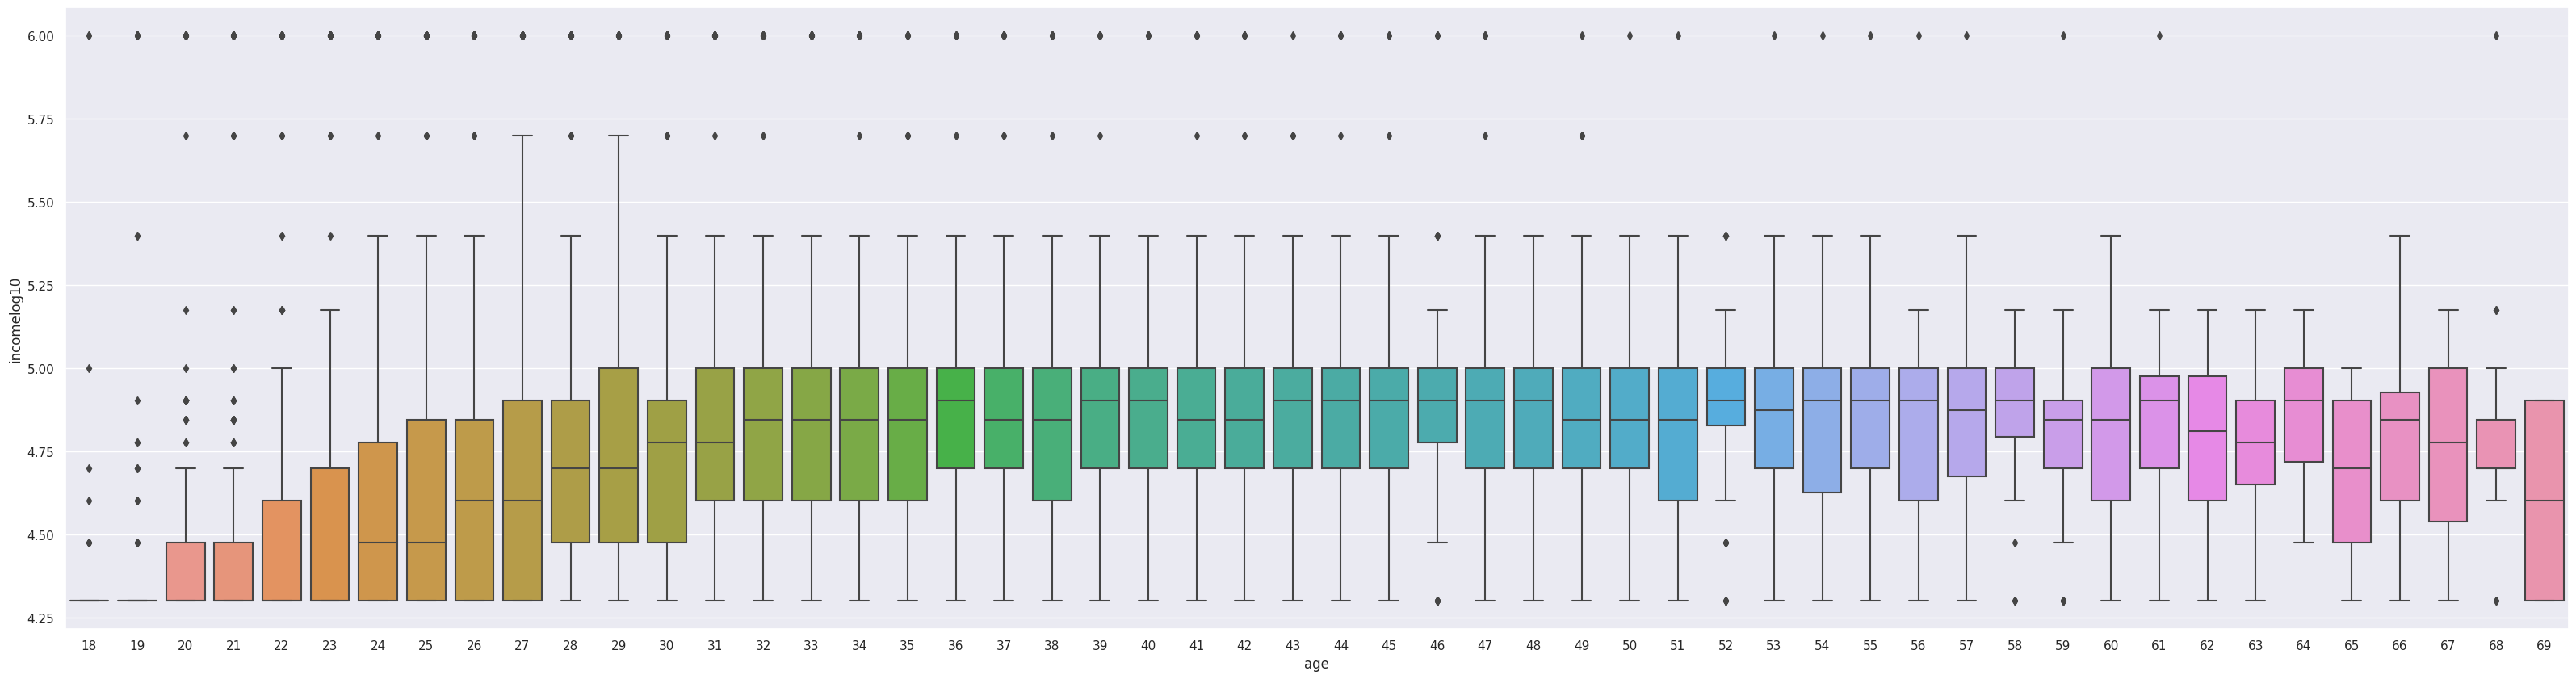

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig, ax = plt.subplots(figsize=(40, 10))

sns.boxplot(df_last, y = 'incomelog10', x ='age')
#df_last.boxplot(column='incomelog10', by='age')

plt.show()

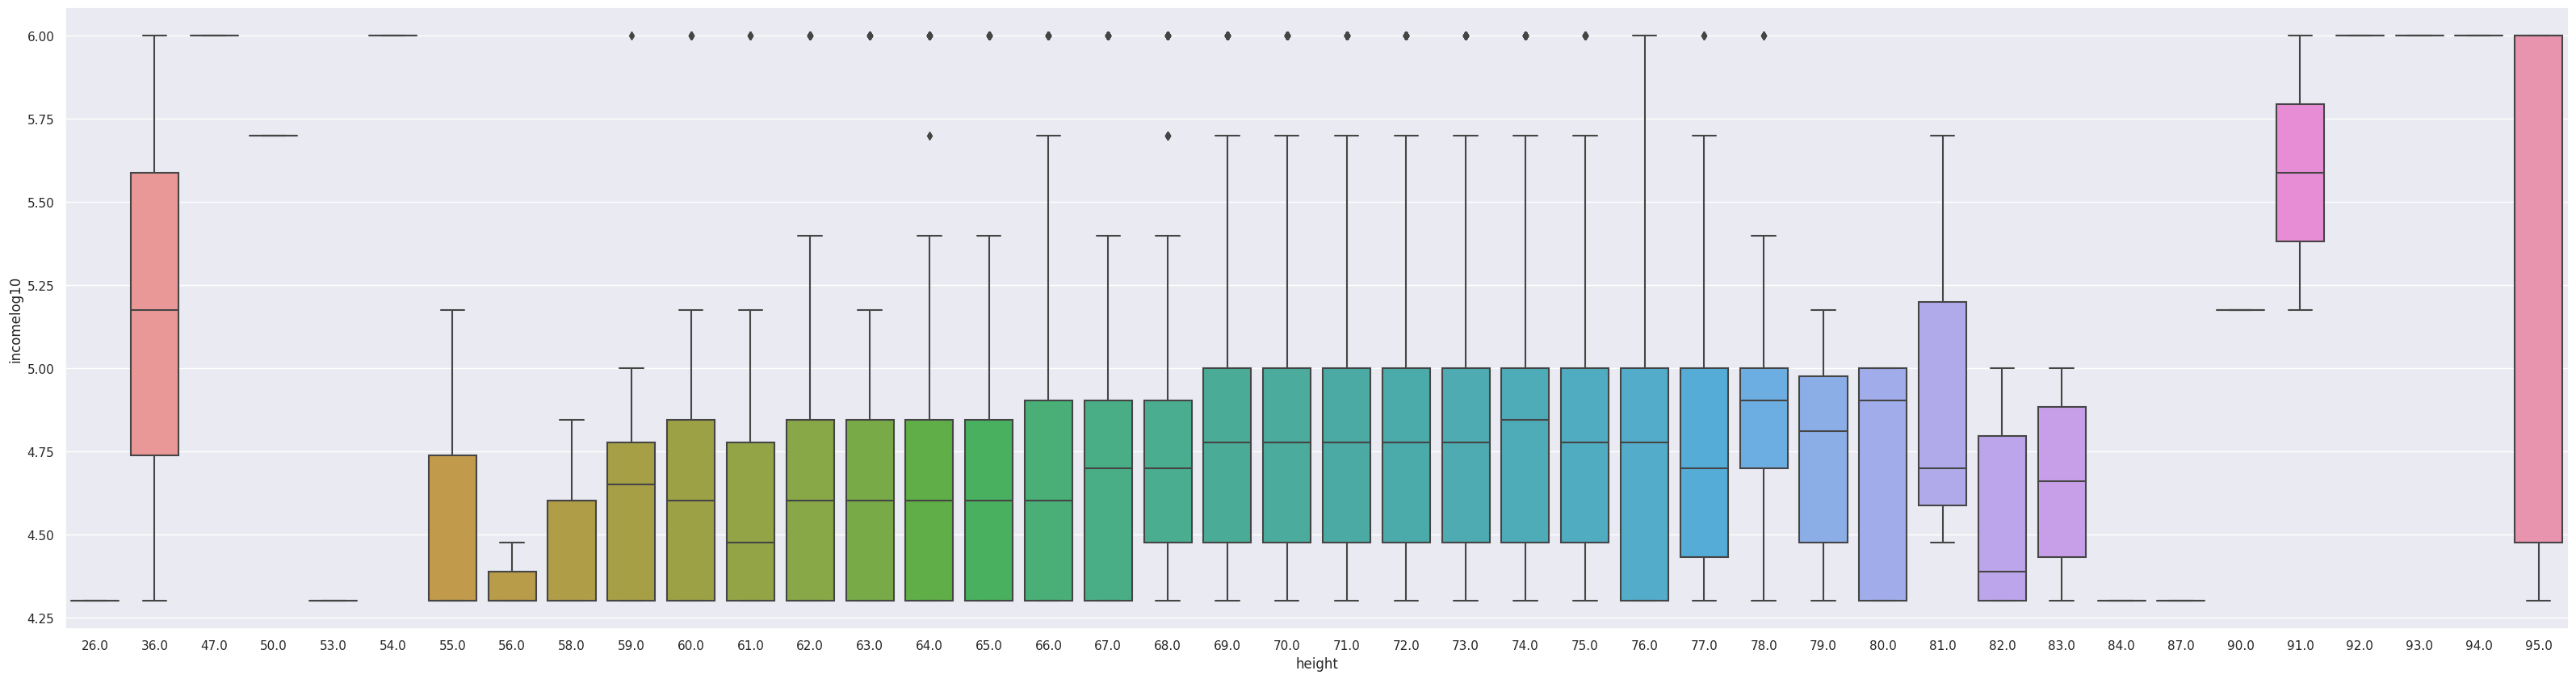

In [20]:

fig, ax = plt.subplots(figsize=(40, 10))
sns.boxplot(df_last, y = 'incomelog10', x ='height')
plt.show()

<Axes: xlabel='is_male', ylabel='incomelog10'>

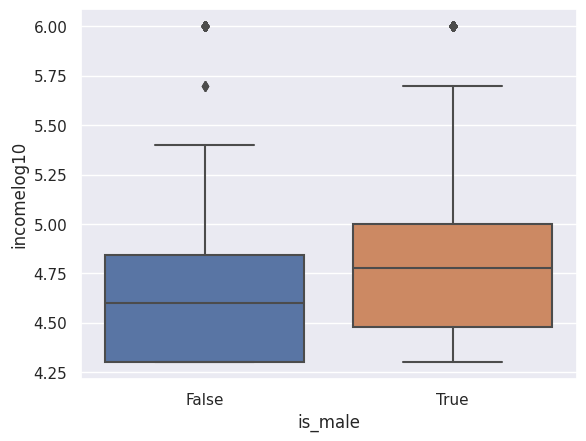

In [21]:
sns.boxplot(df_last, y = 'incomelog10', x ='is_male')


<Axes: xlabel='orientation_bisexual', ylabel='incomelog10'>

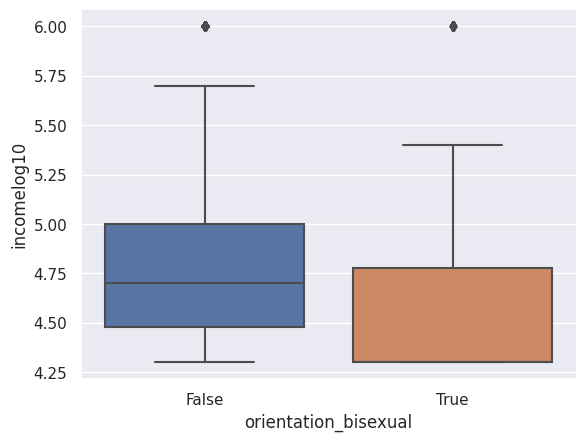

In [22]:
sns.boxplot(df_last, y = 'incomelog10', x ='orientation_bisexual')


<Axes: xlabel='orientation_gay', ylabel='incomelog10'>

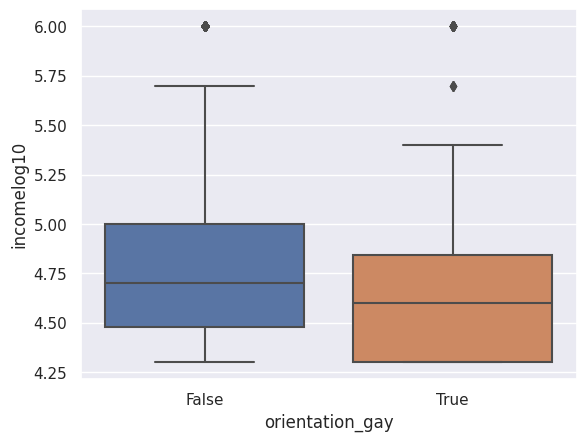

In [23]:
sns.boxplot(df_last, y = 'incomelog10', x ='orientation_gay')


<Axes: xlabel='orientation_straight', ylabel='incomelog10'>

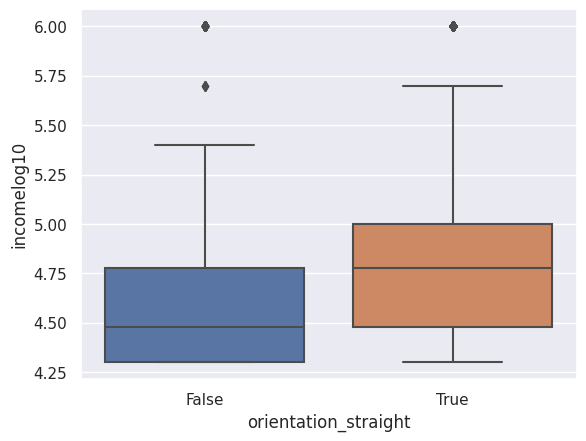

In [24]:
sns.boxplot(df_last, y = 'incomelog10', x ='orientation_straight')


<Axes: xlabel='has_kid', ylabel='incomelog10'>

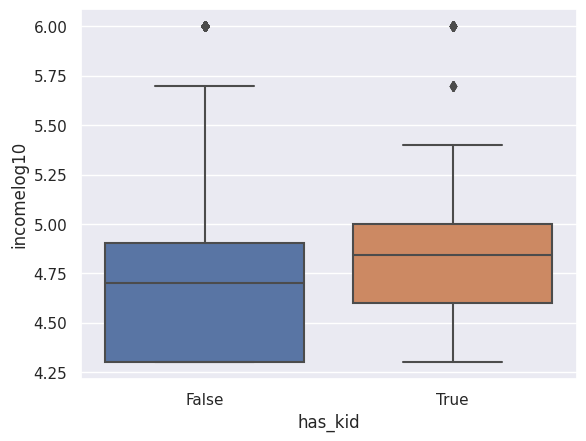

In [25]:
sns.boxplot(df_last, y = 'incomelog10', x ='has_kid')


<Axes: xlabel='language_count', ylabel='incomelog10'>

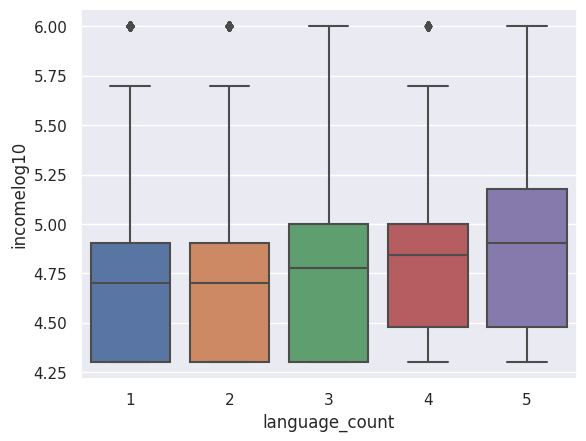

In [26]:
sns.boxplot(df_last, y = 'incomelog10', x ='language_count')

# Hypothesis

## Sexual orientation affect income

Ho: There is no different between income of straight and lgbt

Ha: There is difference between the income of straight people and lgbt people



<Axes: xlabel='incomelog10', ylabel='Density'>

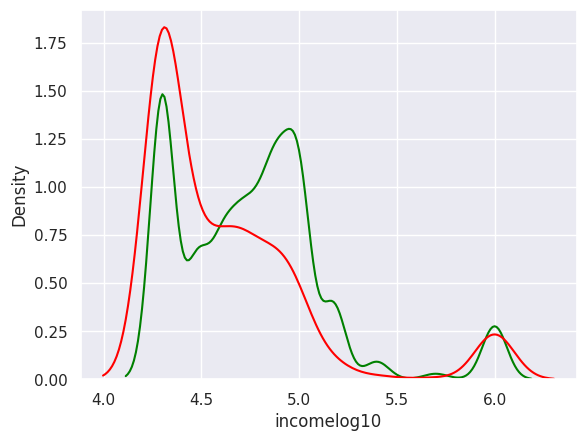

In [27]:
straight=df_last.loc[df_last.orientation_straight]
lgbt=df_last.loc[~df_last.orientation_straight]

s_income = straight.incomelog10
l_income = lgbt.incomelog10

sns.kdeplot(s_income,color='green')
sns.kdeplot(l_income,color='red')

In [28]:
print(s_income.mean())
print(l_income.mean())

4.759317555655891
4.62511426310358


In [29]:
import scipy.stats as stats 
from scipy.stats import chi2_contingency

alpha=0.05
t_value1, p_value1 = stats.ttest_ind(s_income, l_income)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  11.892619009095835 , p_value1 =  2.0022903264258819e-32


In [30]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that There is no different between income of straight and lgbt.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothes is that There is no different between income of straight and lgbt.")

Conclusion: since p_value 2.0022903264258819e-32 is less than alpha 0.05 
Reject the null hypothesis that There is no different between income of straight and lgbt.


## Gender affect income

Ho: There is no different between income of male and female

Ha: There is difference between the income of male and female



<Axes: xlabel='is_male', ylabel='incomelog10'>

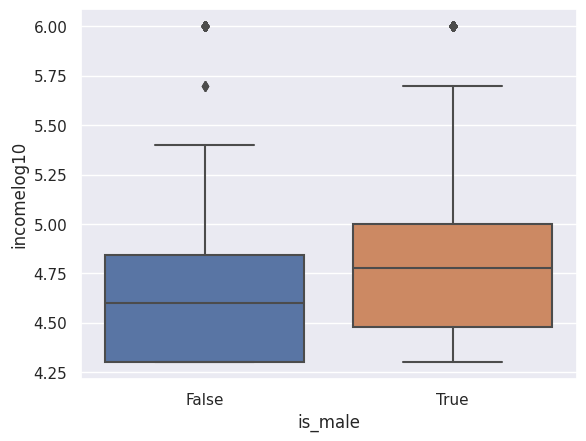

In [31]:
male=df_last.loc[df_last.is_male]
female=df_last.loc[~df_last.is_male]

m_income = male.incomelog10
f_income = female.incomelog10

sns.boxplot(df_last, y = 'incomelog10', x ='is_male')


In [32]:
print(m_income.mean())
print(f_income.mean())

4.775067828852099
4.6549233464555515


In [33]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(m_income, f_income)
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 14.345803933435308 , p_value =2.836517269733523e-46 , p_value_onetail = 1.4182586348667615e-46


In [34]:
# Enter your code and run the cell

if p_value2 < alpha:
    print("Conclusion: since p_value2 {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that There is no different between income of male and female.")
    
else:
    print("Conclusion: since p_value2 {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that There is no different between income of male and female.")

Conclusion: since p_value2 2.0022903264258819e-32 is less than alpha 0.05 
Reject the null hypothesis that There is no different between income of male and female.



## Languages speak affect income

Ho: There is no income change when people speak more language

Ha: There is change when people speak more language



<Axes: xlabel='language_count', ylabel='incomelog10'>

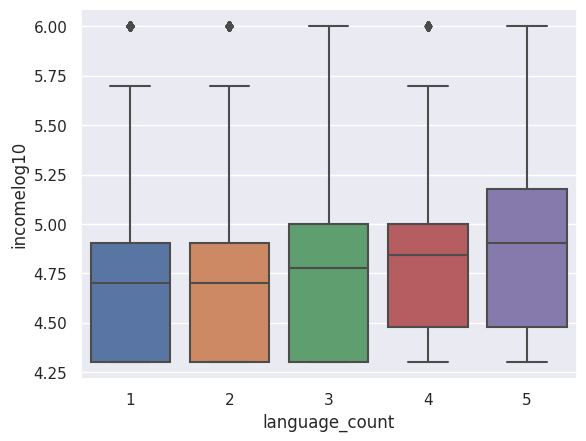

In [35]:
sns.boxplot(df_last, y = 'incomelog10', x ='language_count')


In [36]:
df_last.groupby('language_count').incomelog10.mean()

language_count
1    4.727418
2    4.718950
3    4.764258
4    4.810476
5    4.932876
Name: incomelog10, dtype: float64

In [37]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

df_language = df_last[['language_count','incomelog10']].copy()
formula = 'language_count ~ C(incomelog10)'
model = ols(formula, df_language).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(incomelog10),11.0,155.523992,14.138545,12.236095,2.866821e-23
Residual,11490.0,13276.447839,1.155478,NaN,NaN
